
#ASL Classification using CNN

# GPU Check

In [ ]:
import tensorflow as tf
import time

# Check if a GPU is available
print("Available device:", tf.config.list_physical_devices('GPU'))

# Perform an intensive operation
start = time.time()
a = tf.random.normal([10000, 10000])
b = tf.matmul(a, a)
print("GPU computation time:", time.time() - start)

Available device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU computation time: 0.9839868545532227


#Import Libraries

In [ ]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
# Import the device_lib module from TensorFlow to check available hardware devices
from tensorflow.python.client import device_lib
# List and print all available devices (CPU, GPU, etc.) on the system
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14134726343905421223
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14619377664
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9819949684081255306
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


#Set the Directory

In [ ]:
# Import the drive module from Google Colab to access Google Drive
from google.colab import drive
# Mount Google Drive to the specified directory in Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys  # Import the sys module to access system-specific parameters and functions
# Add a specific directory to the system path
sys.path.append('/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025')

In [ ]:
# Define the path to the new directory
new_directory = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/ASL Dataset'
# Check if the specified directory exists
if os.path.exists(new_directory):
    os.chdir(new_directory)  # If the directory exists, change the current working directory to the new directory
    print("current dir:", os.getcwd())   # Print the current working directory to confirm the change
else:
    print("This directory does not exist:", new_directory)  # If the directory does not exist, print a message

current dir: /content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/ASL Dataset


In [ ]:
# Define the path to the training dataset directory
train_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/asl_alphabet_train/asl_alphabet_train'
# Define the path to the test dataset directory
test_dir = '/content/drive/Shareddrives/AI Project 2024_2025/AI Project 2024_2025/asl_alphabet_test/asl_alphabet_test'

# Load Images and Reshaping

In [ ]:
def get_data(data_dir):
    """
    Function to load images from a directory structured in subfolders.
    Each subfolder represents a class and contains the corresponding images.
    Args:
        data_dir (str): Path to the main directory containing subfolders with images.

    Returns:
        tuple: (images, labels), where:
            - images is a list of images resized to 32x32 pixels.
            - labels is a list of numeric labels corresponding to the folders.
    """
    # Lists to store images and their corresponding labels
    images = []
    labels = []
    # Get a list of subdirectories in the main directory
    dir_list = sorted(os.listdir(data_dir))  # sorted() ensures alphabetical order
    # Iterate through each subdirectory (each subdirectory represents a class)
    for i, dir_name in enumerate(dir_list):
        print("Obtaining images of", dir_name, "...")  # Print the current folder being processed
        sub_dir = os.path.join(data_dir, dir_name)  # Create the full path to the subdirectory
        # Check if the path is indeed a folder
        if os.path.isdir(sub_dir):
            # Iterate over the images in the subdirectory
            for image_name in sorted(os.listdir(sub_dir)):  # sorted() ensures consistency in image order
                img_path = os.path.join(sub_dir, image_name)  # Create the full path to the image
                img = cv2.imread(img_path)  # Load the image using OpenCV
                # Check if the image was successfully loaded
                if img is not None:
                    img = cv2.resize(img, (32, 32))  # Resize image to 32x32 pixels
                    img = np.reshape(img, (32, 32, 3))  # Ensure the image has 3 color channels (RGB)
                    # Append the processed image to the list
                    images.append(img)
                    # Assign a numeric label based on the folder index
                    labels.append(i)
    # Return the loaded images and their corresponding labels
    return images, labels

# Load images from the training directory using the get_data function
X, y = get_data(train_dir)
# Print the number of loaded images and the number of unique labels
print(f"Loaded {len(X)} images with {len(set(y))} unique labels.")

Obtaining images of A ...
Obtaining images of B ...
Obtaining images of C ...
Obtaining images of D ...
Obtaining images of E ...
Obtaining images of F ...
Obtaining images of G ...
Obtaining images of H ...
Obtaining images of I ...
Obtaining images of J ...
Obtaining images of K ...
Obtaining images of L ...
Obtaining images of M ...
Obtaining images of N ...
Obtaining images of O ...
Obtaining images of P ...
Obtaining images of Q ...
Obtaining images of R ...
Obtaining images of S ...
Obtaining images of T ...
Obtaining images of U ...
Obtaining images of V ...
Obtaining images of W ...
Obtaining images of X ...
Obtaining images of Y ...
Obtaining images of Z ...
Obtaining images of del ...
Obtaining images of nothing ...
Obtaining images of space ...
Loaded 87000 images with 29 unique labels.


The function get_data aims to read images from a directory organized into subdirectories, where each subdirectory represents a different class. The images are read, resized, and their labels are generated based on the subdirectory they belong to. It generates a sort of structural representation of all the different directories.


In [ ]:
# print Pictures and Labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 87000
Number of Labels: 87000


# Data Visulisation

In [ ]:
# List of classes in the ASL (American Sign Language) alphabet
classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
           'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']

This code prints the shape of each image and its label. This allows you to verify that the images have been read and preprocessed correctly and that the labels have been assigned properly.

<Figure size 640x480 with 0 Axes>

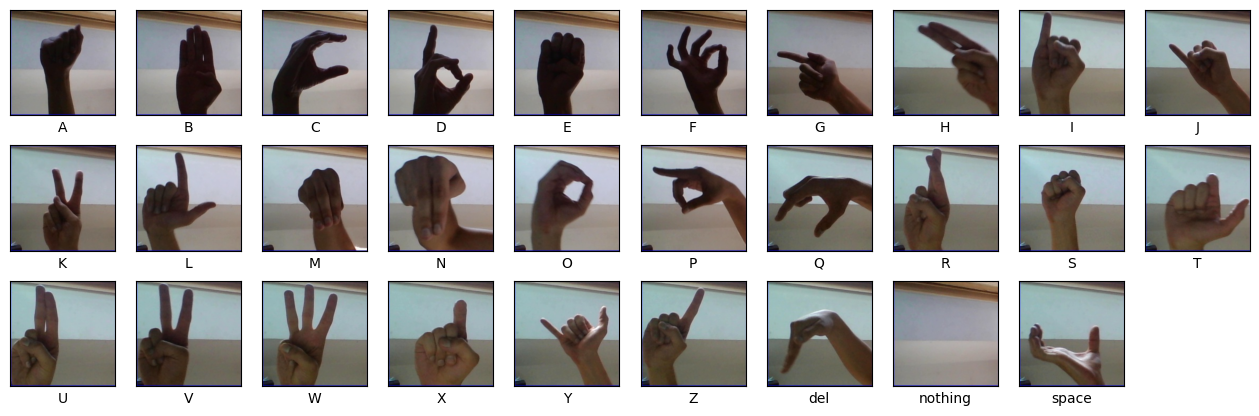

In [ ]:
# Function to plot sample images from the training dataset
def plot_sample_images():
    # Create a new figure for plotting
    figure = plt.figure()
    # Set the size of the figure (16 inches wide by 5 inches tall)
    plt.figure(figsize=(16,5))
    # Loop through the first 29 classes (A-Z + del, nothing, space)
    for i in range(0, 29):
        # Create a subplot with 3 rows and 10 columns, and plot the (i+1)-th image
        plt.subplot(3, 10, i + 1)
        # Remove x and y axis ticks for a cleaner image display
        plt.xticks([])
        plt.yticks([])
        # Construct the file path to the image (assumes the images are named "A1.jpg", "B1.jpg", etc.)
        path = train_dir + "/{0}/{0}1.jpg".format(classes[i])
        # Read the image from the specified path
        img = plt.imread(path)
        # Display the image in the current subplot
        plt.imshow(img)
        # Label the image with the corresponding class (gesture/letter)
        plt.xlabel(classes[i])

# Call the function to plot sample images
plot_sample_images()

# Data Preprocessing: Normalization and One-Hot Encoding

This code defines a function preprocess_data that pre-processes the image data and labels to prepare them for training a machine learning model.
The preprocess_data function normalizes the images, encodes the labels in a one-hot format, and splits the data into training and test sets.
Normalization and one-hot encoding help improve the efficiency and effectiveness of training.
The data split ensures that the model is evaluated fairly and accurately, reducing the risk of overfitting.

In [ ]:
# Function to preprocess the input data (X) and labels (y)
def preprocess_data(X, y):
    # Convert the list of images (X) into a NumPy array
    np_X = np.array(X)
    # Normalize the image data to be in the range [0, 1]
    normalised_X = np_X.astype('float32') / 255.0
    # One-hot encode the labels using the utils module from Keras
    label_encoded_y = utils.to_categorical(y)
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        normalised_X, label_encoded_y, test_size=0.1  # Removed the random_state for no fixed shuffling
    )
    # Print the shapes of the training and test data
    print("Training data:", x_train.shape)
    print("Test data:", x_test.shape)
    # Return the training and test data along with their corresponding labels
    return x_train, x_test, y_train, y_test

# Calling the preprocess_data function to split the data into training and testing sets
x_train, x_test, y_train, y_test = preprocess_data(X, y)

Training data: (78300, 32, 32, 3)
Test data: (8700, 32, 32, 3)


# Define CNN Model

There are 29 different categories (letters of the alphabet and symbols).
During training, the data is divided into small groups called batches. A batch size of 32 means the model will update its weights after processing 32 examples.
An epoch is a complete pass through the entire dataset. Training for 15 epochs means the model will see the entire dataset 15 times. More epochs can improve the model's accuracy, but there is also a risk of overfitting if the number of epochs is too high.
The learning rate determines how quickly the model updates its weights during training. A value of 0.01 is a common compromise: large enough to allow the model to learn quickly, but not so large that it causes instability during training.


In [ ]:
classes = 29 #total number of letters and symbols
batch = 32 #batch's dimension
epochs = 15 #number of epochs
learning_rate = 0.01 #rate of learning

In [ ]:
adam = Adam(learning_rate) #Use the Adam optimizer to update the model's weights during training.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Callback to stop training in case of loss stagnation
early_stop = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=5,  # Stop after 5 epochs without improvement
    restore_best_weights=True,  # Restore the best model weights when training stops
    verbose=1  # Print out information when stopping
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

model = Sequential()  # Create a sequential model, which is a linear stack of layers.

# Add entrance level
model.add(Input(shape=(32, 32, 3)))  # Input layer, where the input shape is 32x32 pixels with 3 color channels (RGB)

# First convolutional block
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Conv2D(64, (3, 3)): adds a convolutional layer with 64 filters of size 3x3.
# padding='same': Keeps the output dimensions the same as the input.
# activation='relu': Uses the ReLU (Rectified Linear Unit) activation function.
model.add(MaxPooling2D(pool_size=(2, 2)))
# MaxPooling2D(pool_size=(2, 2)): Reduces the spatial dimensions of the output (downsampling) by taking the maximum value in each 2x2 window.
model.add(BatchNormalization())
# BatchNormalization(): Normalizes the output of the previous layer to improve training stability and speed.

# Second convolutional block
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
# Conv2D(128, (3, 3)): Adds a convolutional layer with 128 filters of size 3x3.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting by randomly setting 20% of the weights to zero.

# Third convolutional block
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
# Conv2D(256, (3, 3)): Adds a convolutional layer with 256 filters of size 3x3.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

# Fully connected layers (dense layers)
model.add(Flatten())
# Flatten(): Converts the 3D output of the convolutional layers into a 1D vector to be input into the fully connected layers.
model.add(Dropout(0.2))  # Dropout layer to prevent overfitting by randomly setting 20% of the weights to zero.
model.add(Dense(1024, activation='relu'))
# Dense(1024): Adds a fully connected layer with 1024 neurons.
# activation='relu': Uses the ReLU activation function.

# Output layer
model.add(Dense(classes, activation='softmax'))
# Dense(classes): Adds a fully connected layer with a number of neurons equal to the number of classes.
# activation='softmax': Uses the softmax activation function to produce a probability distribution over the classes.

#Network architecture

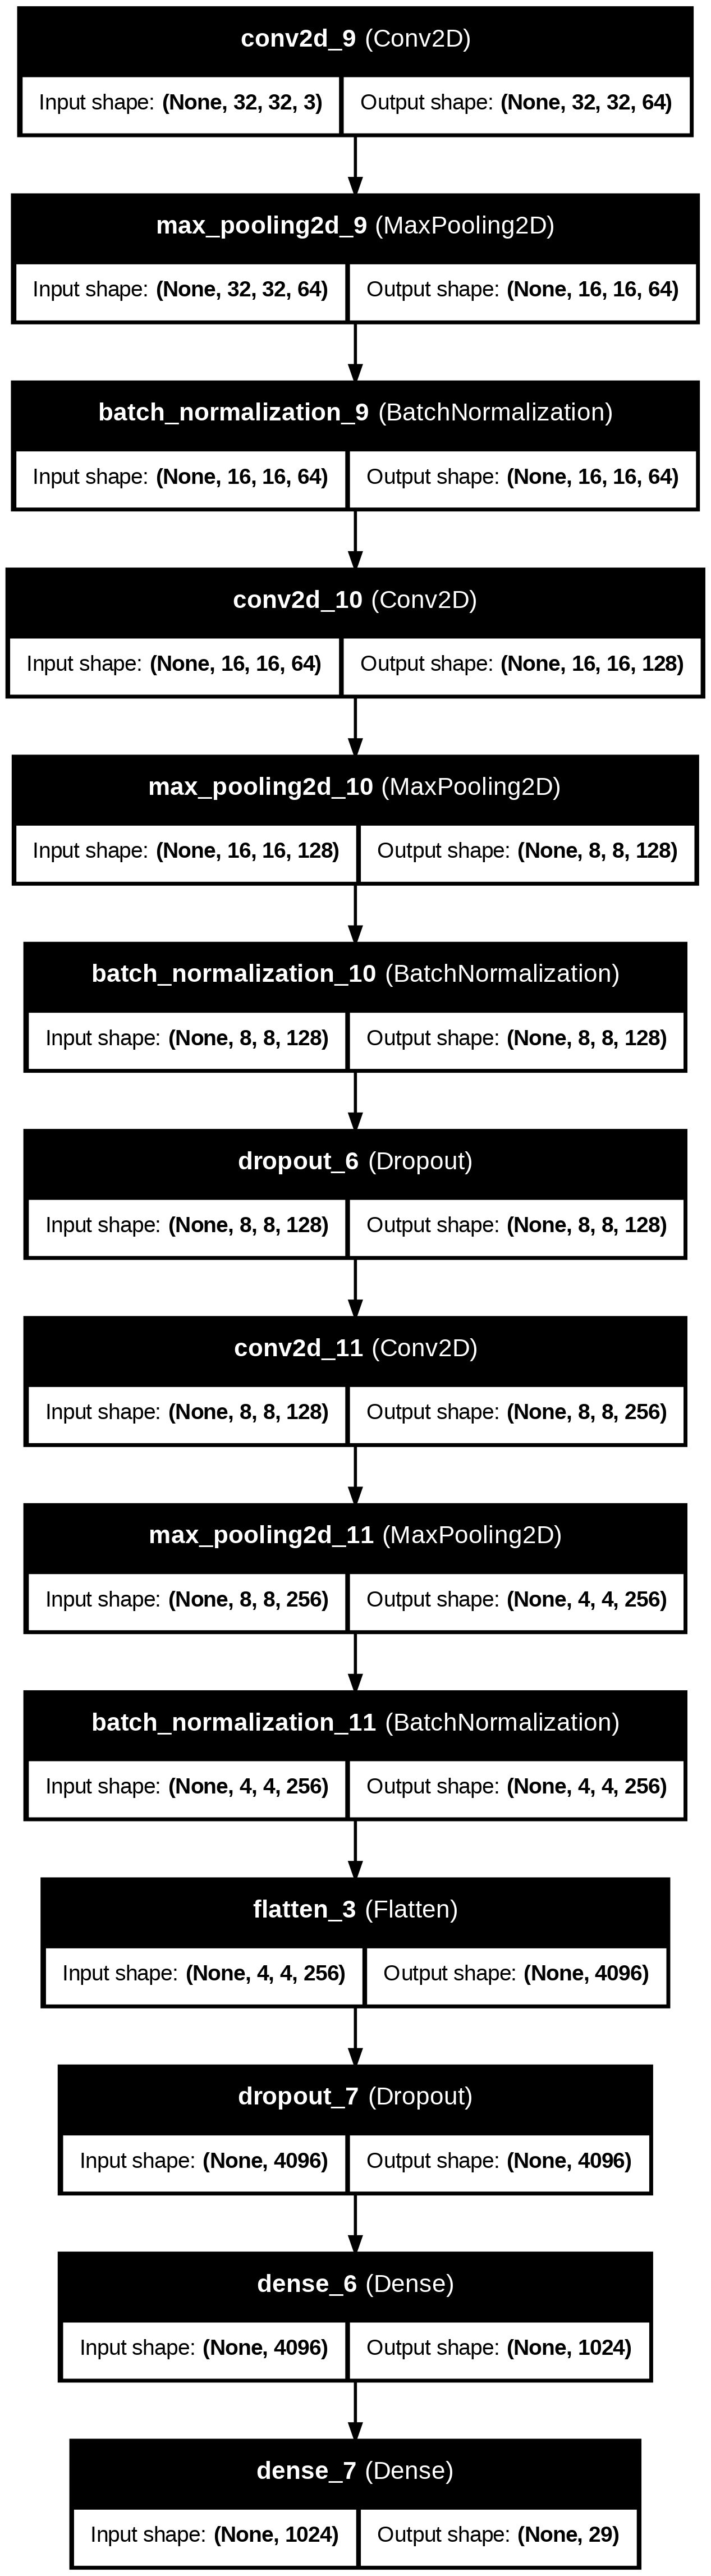

In [ ]:
from tensorflow.keras.utils import plot_model

# Save the model architecture as an image in the current directory
# The image will show the layers of the model and their shapes.
plot_model(model, to_file='model_V1.png', show_shapes=True, show_layer_names=True)
# to_file='model_V1.png': Specifies the file name and location where the model architecture will be saved as an image.
# show_shapes=True: Displays the shape of the data passing through each layer in the model architecture image.
# show_layer_names=True: Displays the name of each layer in the model architecture image.

# Model Compile


In [ ]:
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
# Use the Adam optimizer to update the model's weights during training.
# The Adam optimizer is an adaptive learning rate optimization algorithm that is widely used in deep learning for faster convergence.

# loss='categorical_crossentropy': Specifies the loss function to use.
# 'categorical_crossentropy' is commonly used for multi-class classification problems, where the target labels are one-hot encoded.
# This function calculates the difference between the predicted probability distribution and the actual labels, and the goal is to minimize this difference during training.

# metrics=['accuracy']: Specifies that accuracy will be used as the metric to evaluate the model's performance.
# During training and evaluation, the model's accuracy (the percentage of correct predictions) will be tracked and reported.

In [ ]:
model.summary()
# The command model.summary() in Keras provides a detailed description of the model's architecture.
# It prints the following details about each layer in the model:

# Layer (type): The name and type of the layer (e.g., Conv2D, Dense).
# Output Shape: The shape of the output data after the layer processes the input. This indicates how the dimensions of the data change after the layer.
# Param #: The number of trainable parameters in each layer. These are the weights and biases that will be adjusted during training.
# Total params: The total number of parameters across all layers in the model. This includes both trainable and non-trainable parameters.
# Trainable params: The number of parameters that can be updated during training. These are the parameters the model will learn during the training process.
# Non-trainable params: The number of parameters that will not be updated during training. These are parameters that have been frozen or set to not be adjusted.

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 29)                  │          29,725 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,597,661 (17.54 MB)

 Trainable params: 4,596,765 (17.54 MB)

 Non-trainable params: 896 (3.50 KB)

#Train the Classifier

In [ ]:
history = model.fit(
    x_train,  # Training data
    y_train,  # Labels for the training data
    batch_size=batch,  # Number of samples per gradient update
    epochs=epochs,  # Number of times the entire dataset is passed through the model
    validation_split=0.2,  # 20% of the data will be used as validation set
    shuffle=True,  # Shuffle the training data before each epoch
    verbose=1,  # Print detailed information during training
    callbacks=[early_stop]  # EarlyStopping callback to stop training if validation loss doesn't improve
)

Epoch 1/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.1853 - loss: 3.9945 - val_accuracy: 0.3283 - val_loss: 3.5791
Epoch 2/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5917 - loss: 1.1895 - val_accuracy: 0.8275 - val_loss: 0.5137
Epoch 3/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8017 - loss: 0.6074 - val_accuracy: 0.8239 - val_loss: 0.5816
Epoch 4/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8537 - loss: 0.4926 - val_accuracy: 0.7600 - val_loss: 0.9834
Epoch 5/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8826 - loss: 0.4250 - val_accuracy: 0.8049 - val_loss: 0.9078
Epoch 6/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8760 - loss: 0.4911 - val_accuracy: 0.8646 - val_loss: 0.4848
Epoch 7/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8959 - loss: 0.4274 - val_accuracy: 0.6506 - val_loss: 3.2997
Epoch 8/15
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9044 - loss: 0

###**Considerations:**
During the training process, significant improvements are observed in both accuracy and loss metrics, though some fluctuations occur, particularly in the validation set.  

In the early epochs (such as Epoch 1 and 2), the model improves quickly in both accuracy and loss. In the first epoch, the training accuracy is low (18.53%) and the loss is high (3.9945), but by the second epoch, there is a notable improvement, with accuracy rising to 59.17% and loss decreasing sharply to 1.1895. This reflects strong initial learning during training.  

Throughout epochs 3 and 4, accuracy continues to increase, reaching 80% in the third epoch, while the loss stabilizes around 0.6. However, signs of overfitting begin to emerge, as the validation loss (val_loss) starts to be higher than the training loss. This suggests that the model is adapting too much to the training data and may not generalize well to unseen data.  
  
In the later epochs, training accuracy continues to rise, reaching 88.26% by epoch 5, but validation loss continues to fluctuate. This indicates that the model is not yet perfectly generalizing to validation data. The inconsistency between training and validation accuracy and loss suggests potential overfitting, as validation accuracy does not follow training accuracy exactly.  

The training process was halted before reaching the 15th epoch due to the early stopping mechanism. This was triggered because the validation loss was no longer showing significant improvement, suggesting that further training might not enhance performance and could lead to overfitting. Early stopping preserved the model at its best validation accuracy (achieved in epoch 9, at **93.13%**) and restored the model’s weights to that point.

# Evaluation Model

In [ ]:
# Evaluate the trained model on the test dataset (x_test, y_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
# model.evaluate() returns the loss value and metrics (accuracy in this case)
# after performing evaluation on the test data (x_test) and the corresponding labels (y_test).

# Print the test accuracy value
print('Test Accuracy:', test_acc)
# This prints the accuracy of the model on the test dataset.
# It indicates how well the model is able to classify the unseen test data correctly.

# Print the test loss value
print('Test loss', test_loss)
# This prints the loss value on the test dataset.
# The loss value is a measure of how well the model's predictions match the actual labels (y_test).

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9188 - loss: 0.2937
Test Accuracy: 0.9264367818832397
Test loss 0.27401313185691833


In [ ]:
# Evaluate the model on the training dataset (x_train, y_train)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
# model.evaluate() returns the loss value and the accuracy metric after evaluating the model on the training dataset.
# verbose=0 ensures no output is printed during evaluation.

# Print the training accuracy value, formatted to 4 decimal places
print(f"Training Accuracy: {train_acc:.4f}")
# This prints the accuracy of the model on the training dataset. It indicates how well the model performs on the data it was trained on.

# Print the training loss value, formatted to 4 decimal places
print(f"Training Loss: {train_loss:.4f}")
# This prints the loss value on the training dataset. The loss indicates how far the model’s predictions are from the actual labels during training.

# Evaluate the model on the test dataset (x_test, y_test)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
# Similarly, this evaluates the model on the test dataset (x_test and y_test), providing both the loss and accuracy.

# Print the test accuracy value, formatted to 4 decimal places
print(f"Test Accuracy: {test_acc:.4f}")
# This prints the accuracy of the model on the test dataset. It tells how well the model generalizes to unseen data.

# Print the test loss value, formatted to 4 decimal places
print(f"Test Loss: {test_loss:.4f}")
# This prints the loss value on the test dataset, indicating how well the model performs on data it has not seen before.

Training Accuracy: 0.9337
Training Loss: 0.2374
Test Accuracy: 0.9264
Test Loss: 0.2740


###**Breakdown of Results:**
**Training Accuracy (93.37%):** The model is performing well on the training data, correctly predicting the labels most of the time. It indicates that the model has learned the patterns in the training data effectively.

**Training Loss (0.2374):** The training loss is reasonably low, showing that the model’s predictions are close to the true labels on the training set. While it’s not zero, it's a good indication that the model is making accurate predictions on the data it was trained on.

**Test Accuracy (92.64%):** The test accuracy is also high, indicating that the model generalizes well to new, unseen data. The test accuracy being close to the training accuracy implies that the model isn't overfitting.

**Test Loss (0.2740):** The test loss is slightly higher than the training loss, which is typical. This is because the model is now being evaluated on data it hasn't seen before, and some minor discrepancies are expected. However, the test loss is still low, which means the model is performing well on unseen data.

The model seems to be well-trained, with both high accuracy and low loss on both training and test data.
There is no significant overfitting, as the accuracy and loss on the test set are very close to the results on the training set.
A slightly higher test loss is not unusual and suggests that the model might still benefit from further fine-tuning or training. However, the overall performance is already quite strong.

#Graphical Review

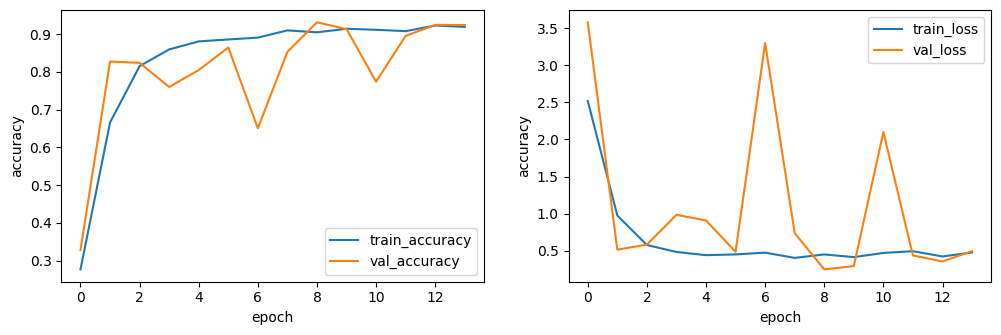

In [ ]:
def plot_results(model):
    # Create a new figure with a size of 12x12 inches
    plt.figure(figsize=(12, 12))
    # First subplot for accuracy over epochs
    plt.subplot(3, 2, 1)
    # Plot the training accuracy ('accuracy') for each epoch
    plt.plot(history.history['accuracy'], label='train_accuracy')
    # Plot the validation accuracy ('val_accuracy') for each epoch
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    # Label the x-axis as 'epoch'
    plt.xlabel('epoch')
    # Label the y-axis as 'accuracy'
    plt.ylabel('accuracy')
    # Display the legend for accuracy plot
    plt.legend()
    # Second subplot for loss over epochs
    plt.subplot(3, 2, 2)
    # Plot the training loss ('loss') for each epoch
    plt.plot(history.history['loss'], label='train_loss')
    # Plot the validation loss ('val_loss') for each epoch
    plt.plot(history.history['val_loss'], label='val_loss')
    # Label the x-axis as 'epoch'
    plt.xlabel('epoch')
    # Label the y-axis as 'loss'
    plt.ylabel('accuracy')
    # Display the legend for loss plot
    plt.legend()
    # Show the plots
    plt.show()

# Call the function to plot the results
plot_results(model)

**1. Training and Validation Accuracy (Left Plot)**
Observations:
- Initial phase (Epochs 0–3):
  - The training accuracy rapidly increases, suggesting the model is effectively learning from the training data.
  - Validation accuracy also increases but fluctuates slightly, indicating that the model generalizes moderately well in this phase.
- Middle phase (Epochs 4–9):
  - Training accuracy continues to improve steadily, nearing 90%.
  - Validation accuracy fluctuates significantly, sometimes decreasing (e.g., Epoch 5 and Epoch 9). These fluctuations could indicate overfitting or instability in generalization.
- Final phase (Epochs 10–12):
  - Both training and validation accuracy stabilize around 90%, suggesting the model has reached its optimal learning phase for accuracy.
  - The convergence between training and validation accuracy is a positive sign, indicating good generalization.

**2. Training and Validation Loss (Right Plot)**
Observations:
- Initial phase (Epochs 0–3):
  - Training loss decreases sharply, consistent with the increase in training accuracy.
  - Validation loss starts very high (around 3.5) but decreases significantly during the first few epochs, which is expected as the model begins to learn.
- Middle phase (Epochs 4–9):
  - Training loss remains low and relatively stable.
  - Validation loss fluctuates dramatically, with sharp spikes (e.g., at Epochs 6 and 9). This could indicate overfitting or sensitivity to specific batches in the validation data.
- Final phase (Epochs 10–12):
  - Training loss remains low and stable, suggesting the model has effectively learned the training data.
  - Validation loss remains low but with minor fluctuations, indicating improved generalization compared to earlier phases.
  
**3. Interpretation of Results**
- Signs of Overfitting:
  - The sharp fluctuations in validation accuracy and loss, particularly in the middle epochs, suggest that the model is overfitting to the training data at times.
  - Training accuracy consistently improves, but validation accuracy does not follow the same steady trend, highlighting potential overfitting.
- Signs of Stabilization:
  - In the final epochs, the convergence of training and validation accuracy indicates that the model has learned to generalize better.
  - Validation loss remains low in the later epochs, which supports the idea that the model has mitigated earlier overfitting.

#Saving the Model

In [ ]:
model.save('asl_model_V1.keras')  # Saves the entire Keras model (architecture, weights, and training state) to a .keras file.

In [ ]:
np.save('x_train_V1.npy', x_train)  # Saves the training input data to a binary .npy file.
np.save('y_train_V1.npy', y_train)  # Saves the training labels to a binary .npy file.
np.save('x_test_V1.npy', x_test)  # Saves the test input data to a binary .npy file.
np.save('y_test_V1.npy', y_test)  # Saves the test labels to a binary .npy file.

# Load the Model

In [ ]:
import os  # Import the os module to interact with the operating system
# Define the path to the new directory
new_directory = '/content/drive/Shareddrives/AI - Project/CNN - First Model'
# Check if the specified directory exists
if os.path.exists(new_directory):
    os.chdir(new_directory)  # If the directory exists, change the current working directory to the new directory
    print("current dir:", os.getcwd())   # Print the current working directory to confirm the change
else:
    print("This directory does not exist:", new_directory)  # If the directory does not exist, print a message

current dir: /content/drive/Shareddrives/AI - Project/CNN - First Model


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('asl_model_V1.keras')   # Update with the correct model path

In [ ]:
import numpy as np

# Load test data from .npy files
x_test = np.load('x_test_V1.npy')  # Load test set features
y_test = np.load('y_test_V1.npy')  # Load test set labels

# Load training data from .npy files
x_train = np.load('x_train_V1.npy')  # Load training set features
y_train = np.load('y_train_V1.npy')  # Load training set labels

# Print the shape (dimensions) of the loaded arrays
print(f"x_test shape: {x_test.shape}")  # Display the dimensions of test set features
print(f"y_test shape: {y_test.shape}")  # Display the dimensions of test set labels
print(f"x_train shape: {x_train.shape}")  # Display the dimensions of training set features
print(f"y_train shape: {y_train.shape}")  # Display the dimensions of training set labels

x_test shape: (8700, 32, 32, 3)
y_test shape: (8700, 29)
x_train shape: (78300, 32, 32, 3)
y_train shape: (78300, 29)


# Predictions

In [ ]:
# Make predictions on the test set using the trained model
predictions = model.predict(x_test)

# Print the first 5 predictions (probabilities for each class in case of classification)
print(predictions[:5])

# Compare the first 5 predictions with the actual labels
for i in range(5):
    print(f"Prediction: {np.argmax(predictions[i])}, Actual Label: {np.argmax(y_test[i])}")
    # np.argmax(predictions[i]) returns the index of the class with the highest probability
    # np.argmax(y_test[i]) returns the actual class label

272/272 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
[[2.94426010e-14 1.55661383e-15 3.85708379e-14 3.62507781e-05
  6.42073894e-12 4.56267298e-05 1.33600487e-24 3.44194681e-25
  3.21031355e-19 2.83976984e-25 8.43499719e-15 9.99916315e-01
  2.25151524e-08 3.59246748e-15 1.83907821e-06 1.02001858e-16
  4.66627804e-26 3.74435827e-14 5.05402442e-10 6.21350082e-09
  1.97999845e-19 2.58847848e-13 9.66238524e-18 2.17815629e-19
  7.51048783e-15 1.19295057e-23 0.00000000e+00 7.95900180e-21
  2.82100165e-27]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.49997790e-40
  2.59240216e-43 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.21174564e-36 1.28919459e-43 1.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.42446440e-34 0.00000000e+00 0.00000000e+00 0.000000

In [ ]:
# Make predictions on the test set using the trained model
predictions = model.predict(x_test)

# Probability of the 15th example
for index, probability in enumerate(predictions[15]):
    print(f'{index}: {probability:.10%}')
    # Prints the class index and its corresponding probability as a percentage with 10 decimal places

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000000%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000000%
6: 100.0000000000%
7: 0.0000000000%
8: 0.0000000000%
9: 0.0000000000%
10: 0.0000000000%
11: 0.0000000000%
12: 0.0000000000%
13: 0.0000000000%
14: 0.0000000000%
15: 0.0000000000%
16: 0.0000000000%
17: 0.0000000000%
18: 0.0000000000%
19: 0.0000000000%
20: 0.0000000000%
21: 0.0000000000%
22: 0.0000000000%
23: 0.0000000000%
24: 0.0000000000%
25: 0.0000000000%
26: 0.0000000000%
27: 0.0000000000%
28: 0.0000000000%


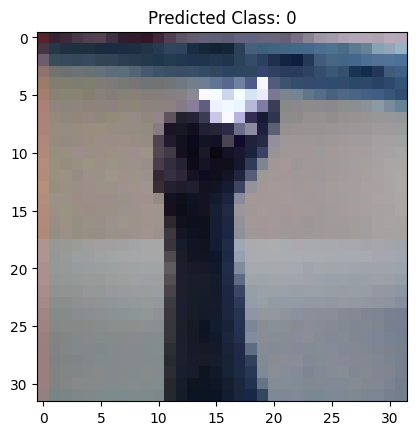

In [ ]:
# Display the image of the selected example
plt.imshow(x_test[13], cmap='gray')  # Change 'cmap' based on the image type (e.g., 'gray' for grayscale images)
plt.title(f'Predicted Class: {np.argmax(predictions[13])}')  # Show the predicted class in the title
plt.show()  # Display the image

# Create a dictionary to match positional indices to letters

In [ ]:
# Define the labels for ASL signs (update based on your dataset)
labels = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z',
    26: 'del', 27: 'nothing', 28: 'space'  # Special signs: 'del' (delete), 'nothing', and 'space'
}

# Incorrect predictions classified

Index: 8, Predicted: M, Expected: N


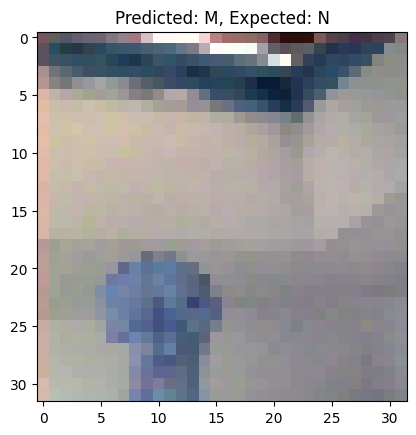

Index: 41, Predicted: M, Expected: N


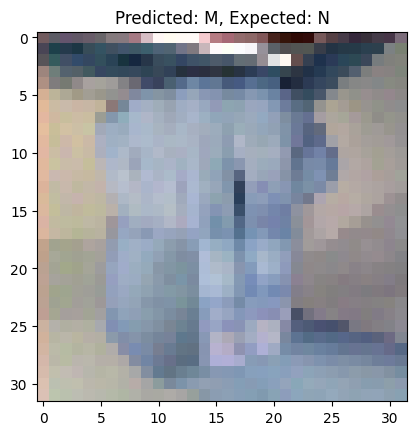

Index: 55, Predicted: O, Expected: C


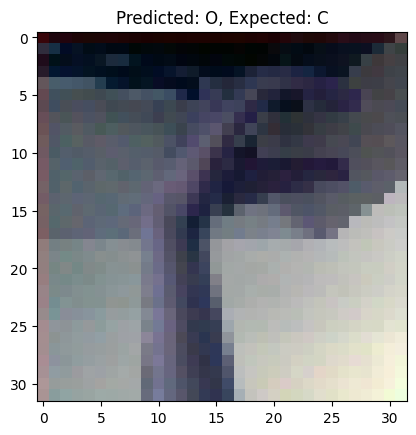

Index: 73, Predicted: I, Expected: X


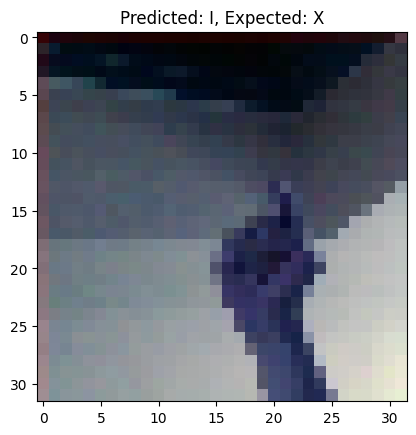

Index: 74, Predicted: M, Expected: S


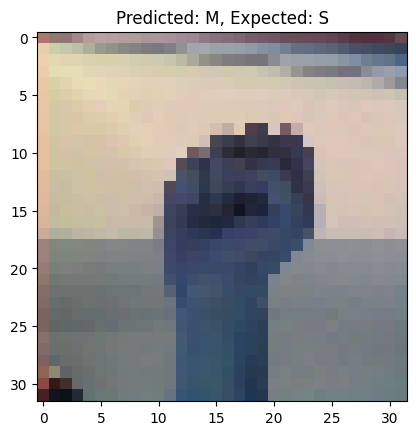

In [ ]:
# List to store incorrect predictions
incorrect_predictions = []

# Iterate through predictions and actual labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)  # Get the predicted and actual class indices
    # If the prediction is incorrect, store relevant details
    if predicted != expected:
        incorrect_predictions.append((i, x_test[i], labels[predicted], labels[expected]))

# Display the first 5 incorrect predictions
for idx, img, pred, exp in incorrect_predictions[:5]:
    print(f"Index: {idx}, Predicted: {pred}, Expected: {exp}")  # Print index, predicted, and actual labels
    plt.imshow(img)  # Show the corresponding image
    plt.title(f"Predicted: {pred}, Expected: {exp}")  # Set title with prediction details
    plt.show()  # Display the image

In [ ]:
# Get the number of incorrect predictions
num_incorrect_predictions = len(incorrect_predictions)

# Print the total number of mistaken predictions
print(f"Mistaken Predictions: {num_incorrect_predictions}")

Mistaken Predictions: 640


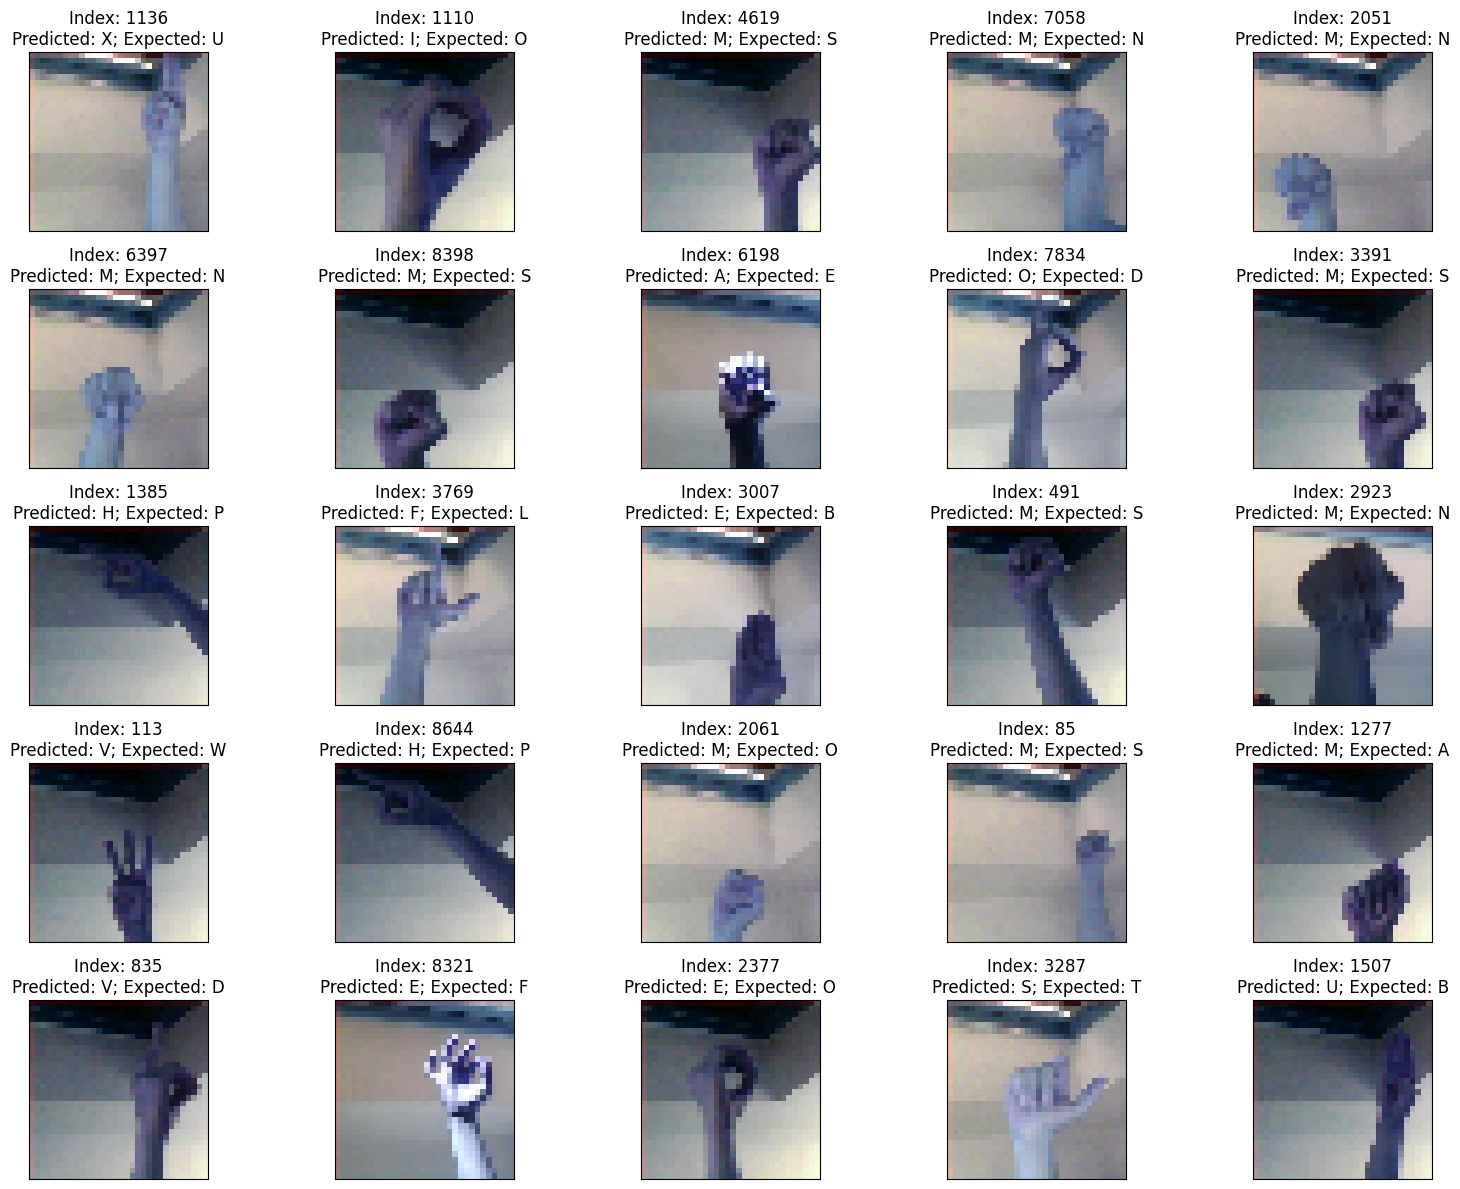

In [ ]:
# Select 25 random indices from the list of incorrect predictions
random_indices = np.random.choice(np.arange(len(incorrect_predictions)), 25, replace=False)
# Create a list of randomly selected incorrect prediction items
random_images = [incorrect_predictions[i] for i in random_indices]
# Create a 5x5 grid of subplots to display the images
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 12))

# Loop through each subplot and display an image with its details
for ax, item in zip(axes.ravel(), random_images):
    index, image, predicted, expected = item  # Unpack the details of each incorrect prediction
    ax.imshow(image, cmap=plt.cm.gray_r)  # Show the image (grayscale)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_title(f'Index: {index}\nPredicted: {predicted}; Expected: {expected}')  # Set the title with prediction details

# Adjust layout to make sure everything fits nicely
plt.tight_layout()

# Show the plot with the random incorrect predictions
plt.show()

#Correct Predictions Classified

In [ ]:
# List to store correct predictions
correct_predictions = []

# Iterate through predictions and actual labels
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)  # Get the predicted and actual class indices

    # If the prediction is correct, store relevant details
    if predicted == expected:
        correct_predictions.append((i, x_test[i], labels[predicted], labels[expected]))  # Append index, image, predicted, and expected class

In [ ]:
# Get the number of correct predictions
num_correct_predictions = len(correct_predictions)

# Print the total number of correct predictions
print(f"Correct Predictions: {num_correct_predictions}")

Correct Predictions: 8060


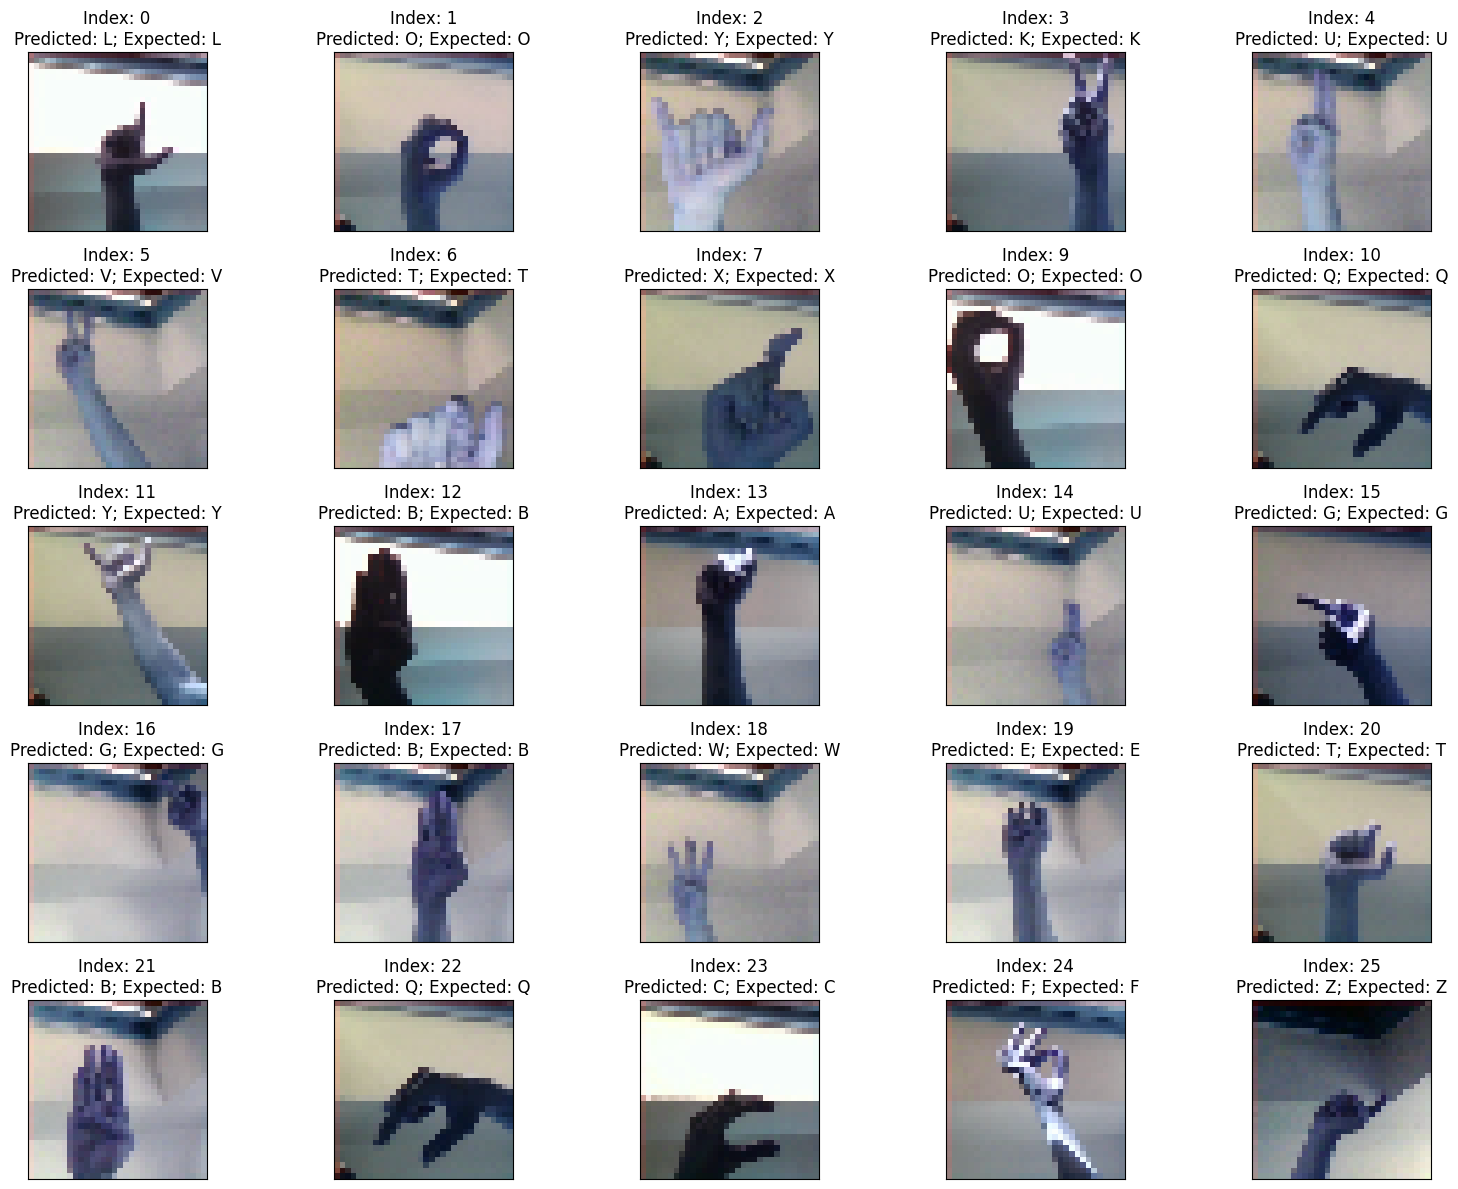

In [ ]:
# Create a 5x5 grid of subplots to display the images
figure, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 12))

# Loop through each subplot and display an image with its details
for ax, item in zip(axes.ravel(), correct_predictions):
    index, image, predicted, expected = item  # Unpack the details of each correct prediction
    ax.imshow(image, cmap=plt.cm.gray_r)  # Show the image (grayscale)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_title(f'Index: {index}\nPredicted: {predicted}; Expected: {expected}')  # Set the title with prediction details

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot with the correct predictions
plt.show()

After evaluating the model's performance, the following results were observed:
- **Total Predictions: 8700 (8060 correct, 640 incorrect)**
- Accuracy: The model successfully classified 8060 out of 8700 images, which gives it an impressive accuracy of approximately 92.7%. This indicates that the CNN has learned well to identify the hand gestures corresponding to the different letters of the sign language alphabet.

### **Model Strengths:**
1.	High Accuracy: With 92.7% accuracy, the model is quite robust at recognizing sign language gestures. This is a great result, especially considering the complexity of hand shapes and positions involved in distinguishing different letters.
2.	Confidence in Predictions: For the vast majority of predictions, the model is highly confident (with probabilities close to 1) in its classifications. This shows the model is not only accurate but also confident in the predictions it makes, which is important in real-world applications like sign language recognition.
3.	Generalization: The model performs well across the entire dataset, suggesting that it has generalized its learning well and is not just memorizing specific images but understanding the underlying patterns of hand gestures.

### **Areas for Improvement:**
1.	Misclassifications (640 errors): Although the model performs very well, there are still 640 incorrect classifications, which constitute about 7.3% of the total predictions. This shows that there are cases where the model struggles to distinguish certain signs, which could potentially involve visually similar gestures or cases where the hand shape is ambiguous.
2.	Confusion Between Similar Signs: In sign language, some gestures (such as the signs for certain letters) can be similar to each other, especially if there are subtle differences in finger positioning or hand orientation. The model may have difficulty distinguishing between these. Further investigation of the misclassified instances could highlight which letters are being confused.
3.	Environmental Variations: Misclassifications might also occur due to variations in lighting, background noise, or hand occlusion. A model trained on images with inconsistent conditions might struggle in real-world settings where these factors come into play.

#Confusion Matrix

272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Shape of y_test: (8700,)
Shape of y_pred: (8700, 29)
Confusion Matrix (DataFrame):
           A    B    C    D    E    F    G    H    I    J  ...    T    U    V  \
A        294    0    0    0    6    0    0    0    0    0  ...    0    2    0   
B          0  263    0    0    3    0    0    0    0    0  ...    0   26    0   
C          0    0  293    1    1    0    0    0    0    0  ...    0    0    0   
D          0    2    0  262    3    0    0    0    0    0  ...    0    2    8   
E         38    0    0    0  258    0    0    0    0    0  ...    0    8    0   
F          0    0    0    0   12  285    0    0    0    0  ...    0    0    0   
G          0    0    0    0    0    0  288    3    3    0  ...    0    0    0   
H          0    0    0    0    0    0    2  291    0    0  ...    0    0    0   
I          0    0    0    0    5    0    0    0  266    0  ...    0    0    0   
J          0    0    0    0    0    0    0    0    0  276  ...    

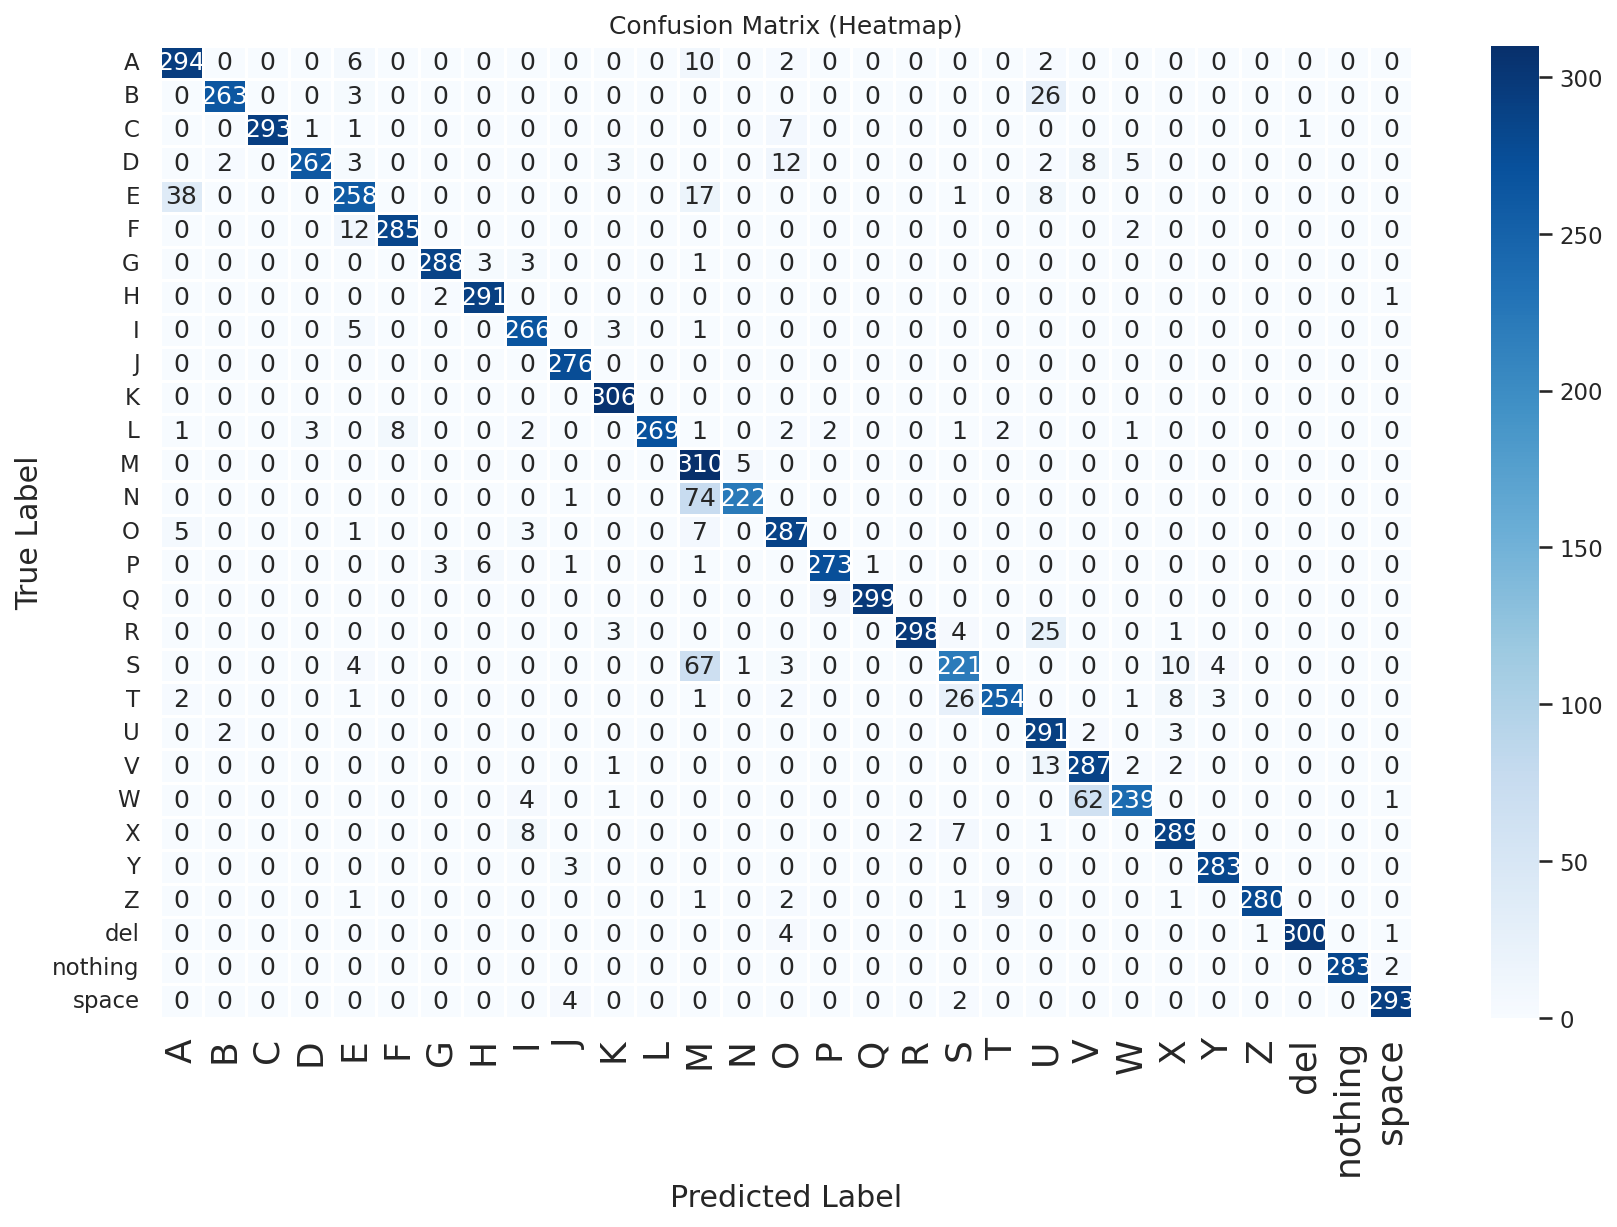

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import itertools

# Set style for the plots
plt.style.use('fivethirtyeight')  # Use only one style
sns.set(context="notebook", palette="dark", style='whitegrid', color_codes=True)  # Set Seaborn style

# Global plot configuration parameters
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]  # Set figure size for all plots
}

plt.rcParams.update(params)  # Apply the configuration globally

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function plots the confusion matrix.
    If `normalize` is True, the matrix will be normalized.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the matrix if required

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Display the confusion matrix
    plt.title(title)
    plt.colorbar()  # Show color bar for the matrix
    tick_marks = np.arange(len(classes))  # Position for tick marks
    plt.xticks(tick_marks, classes, rotation=45)  # Set class labels for x-axis
    plt.yticks(tick_marks, classes)  # Set class labels for y-axis

    # Add the numeric values on the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]:.2f}' if normalize else f'{cm[i, j]}',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")  # Text color based on the value

    plt.tight_layout()
    plt.ylabel('True label')  # y-axis label
    plt.xlabel('Predicted label')  # x-axis label

# Make predictions
y_pred = model.predict(x_test)  # Predictions on the test data

# Class labels (for ASL signs in this case)
labels_cm = ("A","B","C","D","E","F","G","H","I","J","K","L","M","N","O",
          "P","Q","R","S","T","U","V","W","X","Y","Z", "del", "nothing", "space")  # Class labels

# Check the shape of y_test to understand if it's one-hot encoded or already a label array
print(f"Shape of y_test: {y_test.shape}")  # Shape of the actual labels
print(f"Shape of y_pred: {y_pred.shape}")  # Shape of the predicted labels

# If y_test is one-hot encoded, use argmax to get the labels
if y_test.ndim > 1:  # If it's a 2D array (one-hot encoded)
    y_test = np.argmax(y_test, axis=1)  # Convert to class indices

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, np.argmax(y_pred, axis=1))  # Compare true labels with predicted ones

# Create a DataFrame for better visualization
df_cm = pd.DataFrame(confusion_mtx, index=labels_cm, columns=labels_cm)
print("Confusion Matrix (DataFrame):")
print(df_cm)  # Display the confusion matrix as a DataFrame

# Heatmap with Seaborn
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=.5)  # Create the heatmap with integer annotations
plt.title("Confusion Matrix (Heatmap)")  # Title of the heatmap
plt.ylabel("True Label")  # y-axis label
plt.xlabel("Predicted Label")  # x-axis label
plt.show()  # Display the heatmap

The confusion matrix shows the classification results of our model for each of the 29 classes (letters of the sign language alphabet, "del", "nothing", and "space"). Each row in the matrix corresponds to the true class (the correct label), and each column corresponds to the predicted class. The values along the main diagonal (from the upper-left to the bottom-right) represent correct classifications, while values outside the diagonal indicate misclassifications.
### **1. Correct Classifications (along the diagonal):**
The highest values are found along the diagonal, meaning the model has correctly classified most of the images. Here are some examples of values along the diagonal:
-	A: 294 images correctly classified as "A"
-	B: 263 images correctly classified as "B"
-	C: 293 images correctly classified as "C"
-	F: 285 images correctly classified as "F"
-	T: 254 images correctly classified as "T"
-	space: 293 images correctly classified as "space"
This shows that most of the letters (and the "del", "nothing", and "space" classes) were correctly identified by the model, with values ranging from 250 to 300 for each of them.
### **2. Misclassifications (off-diagonal):**
Let's look at some areas where the model made errors, indicating that it confused one class with another. Some examples of misclassifications:
-	Class "A": 6 images of "A" were incorrectly classified as "E".
-	Class "B": 26 images of "B" were incorrectly classified as "U".
-	Class "D": 8 images of "D" were incorrectly classified as "T".
-	Class "S": 10 images of "S" were incorrectly classified as "T", and 4 images as "U".
-	Class "del": 1 image of "del" was incorrectly classified as "Z".
### **3. Confusion Patterns:**
From these errors, we can observe some patterns:
-	Some misclassifications occur between similar letters (for example, "S" confused with "T", "B" with "U"). This is quite common in sign images where the differences between gestures can be subtle (for example, finger position or hand orientation).
-	"del" and "nothing" classes: These two classes seem to be well-separated from the others, but there are still occasional errors, like "nothing" being confused with other letters.
-	The "space" class was well-recognized, with all 293 images correctly classified. This suggests that the model has learned to distinguish the space sign well.
### **4. Actions to Improve:**
Some of the errors suggest that the model could benefit from further optimizations:
-	Better distinction between similar letters: For letters that are frequently confused (e.g., "S" and "T" or "B" and "U"), it might help to gather more training data that better represents the variability in these signs, to improve accuracy in these classifications.
-	More attention to "del" and "nothing" classes: Although these classes seem to be correctly classified most of the time, it might be useful to explore any patterns leading to confusion between these classes and other letters, and determine if there are errors that could be reduced.
-	Class balancing: If some classes have significantly more errors, it might be helpful to explore data balancing techniques to reduce cases where one class might dominate over the others.

#SHAP
#### Representation to show points that have positive (red) or negative (blue) impact on correct predictions

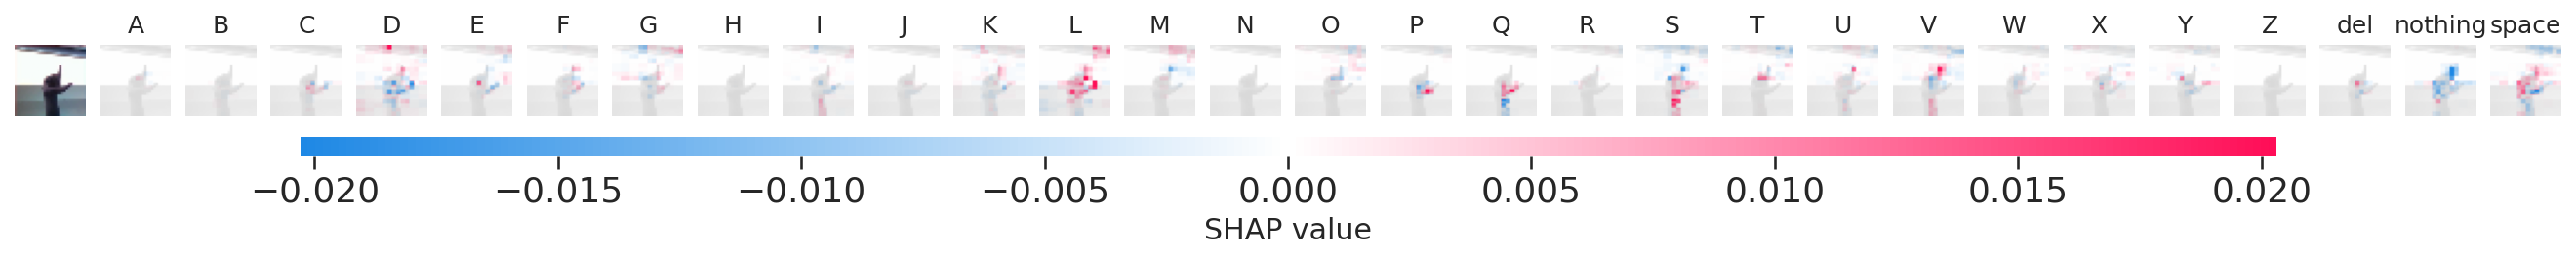

In [ ]:
import shap

# Assuming you have a pre-trained model called `model`
def f(x):
    # The model function that simply takes in data and returns model predictions
    tmp = x.copy()  # Creating a copy of the input to avoid changing the original
    return model(tmp)

# Step 1: Define masker for image data (with a blur operation)
# The masker is used to create a blur mask of the image for SHAP computation
masker_blur = shap.maskers.Image("blur(32,32)", x_test[0].shape)  # Adjust the blur size if needed

# Step 2: Select the first image from x_test for evaluation
ind = [0]  # Use the first image (index 0) from x_test for SHAP computation

# Step 3: Check if the image is in the correct range
x_test_processed = x_test[ind]

# Step 4: Ensure x_test_processed is in the correct range
if x_test_processed.max() <= 255:
    # If it's integer (0-255), clip to that range
    x_test_processed = np.clip(x_test_processed, 0, 255)
elif x_test_processed.max() <= 1.0:
    # If it's float (0.0-1.0), clip to that range
    x_test_processed = np.clip(x_test_processed, 0, 1)

# Step 5: Create the SHAP explainer
# No need to specify output_names if the model has standard output for classification
explainer = shap.Explainer(f, masker_blur, output_names=labels_cm)

# Step 6: Calculate SHAP values using the original x_test data
shap_values_ = explainer(x_test_processed, max_evals=5000, batch_size=50)

# Step 7: Visualize the SHAP values for the selected image
shap.image_plot(shap_values_[0], show=True)  # This will display the image and SHAP values

### **1. General structure of the analysis**
- The SHAP heatmap shows the impact of different regions of the images on the model’s predictions.
- Each image corresponds to a letter or a special command (e.g., "space," "nothing," "del").
- SHAP values indicate the importance of various areas of the image for correctly classifying a letter:
  - **Red** = greater positive contribution to the prediction.
  - **Blue** = negative contribution or areas that make the prediction more challenging for the model.



### **2. Observations on the letters and symbols**
#### **Well-classified letters (e.g., D, L, T, R)**
- For some letters (e.g., **D**, **L**, **T**, **R**), we observe well-defined regions of intense red coloring.  
  - This suggests the model is leveraging visually distinctive features, such as the position of the fingers or the overall hand shape, to make accurate predictions.
  - For example, in the letter **L**, the model seems to focus correctly on the thumb and index finger forming the characteristic angle of the letter.

#### **Problematic or ambiguous letters (e.g., B, M, N, U)**
- Letters like **B**, **M**, **N**, and **U** show a more dispersed SHAP value distribution. This could indicate:
  - **Visual overlap**: These letters may have similar hand poses, making it harder for the model to distinguish them.
  - **Insufficient data**: There might be a lack of diverse examples in the dataset for these letters, causing the model to learn less robust features.
  - **Weak features**: The CNN may not have identified strong, distinctive features for these letters.

#### **Special symbols (e.g., del, nothing, space)**
- Classes like **del**, **nothing**, and **space** often show diffuse SHAP value distributions, especially for "nothing."
  - For **nothing**, the CNN appears confused, with SHAP values being poorly focused or attributed to irrelevant regions, such as the background.
  - This could indicate that the model struggles to differentiate between "absence of a sign" and actual signs.


### **3. General considerations**
#### **Model focus areas**
- The CNN primarily focuses on the contours of the hands, but some letters show significant SHAP contributions from the background. This might be a sign of overfitting or an excessive reliance on contextual background information rather than the hand shape itself.
- In some letters (e.g., **space**, **del**), the model appears to assign importance to random or less relevant areas. This might indicate that the network has not learned the specific features properly.

#### **Class separability**
- Letters like **M**, **N**, and **U** present dispersed contributions, suggesting the model might confuse them. These letters likely share similar poses, creating ambiguity during training.



